<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/School_Work_4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb


In [ ]:
dataset = pd.read_csv("/content/sample_data/BankNoteAuthenticity-1.csv")

In [ ]:
dataset

,VarianceOfWavelet,SkewnessOfWavelet,KurtosisOfWavelet,EntropyOfImage,Authenticity,Auth
0,3.62160,8.66610,-2.8073,-0.44699,0,Yes
1,4.54590,8.16740,-2.4586,-1.46210,0,Yes
2,3.86600,-2.63830,1.9242,0.10645,0,Yes
3,3.45660,9.52280,-4.0112,-3.59440,0,Yes
4,0.32924,-4.45520,4.5718,-0.98880,0,Yes
...,...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1,No
1368,-1.38870,-4.87730,6.4774,0.34179,1,No
1369,-3.75030,-13.45860,17.5932,-2.77710,1,No
1370,-3.56370,-8.38270,12.3930,-1.28230,1,No


In [ ]:
data = {'authenticity' : ['Yes', 'No', 'Yes', 'No']}
df = pd.DataFrame(data)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df['authenticity_numeric'] = df['authenticity'].map({'Yes': 1, 'No': 0})

In [ ]:
print(df)

  authenticity  authenticity_numeric
0          Yes                     1
1           No                     0
2          Yes                     1
3           No                     0


In [ ]:
X = dataset.iloc[:, :4]
y = dataset.iloc[:,5]

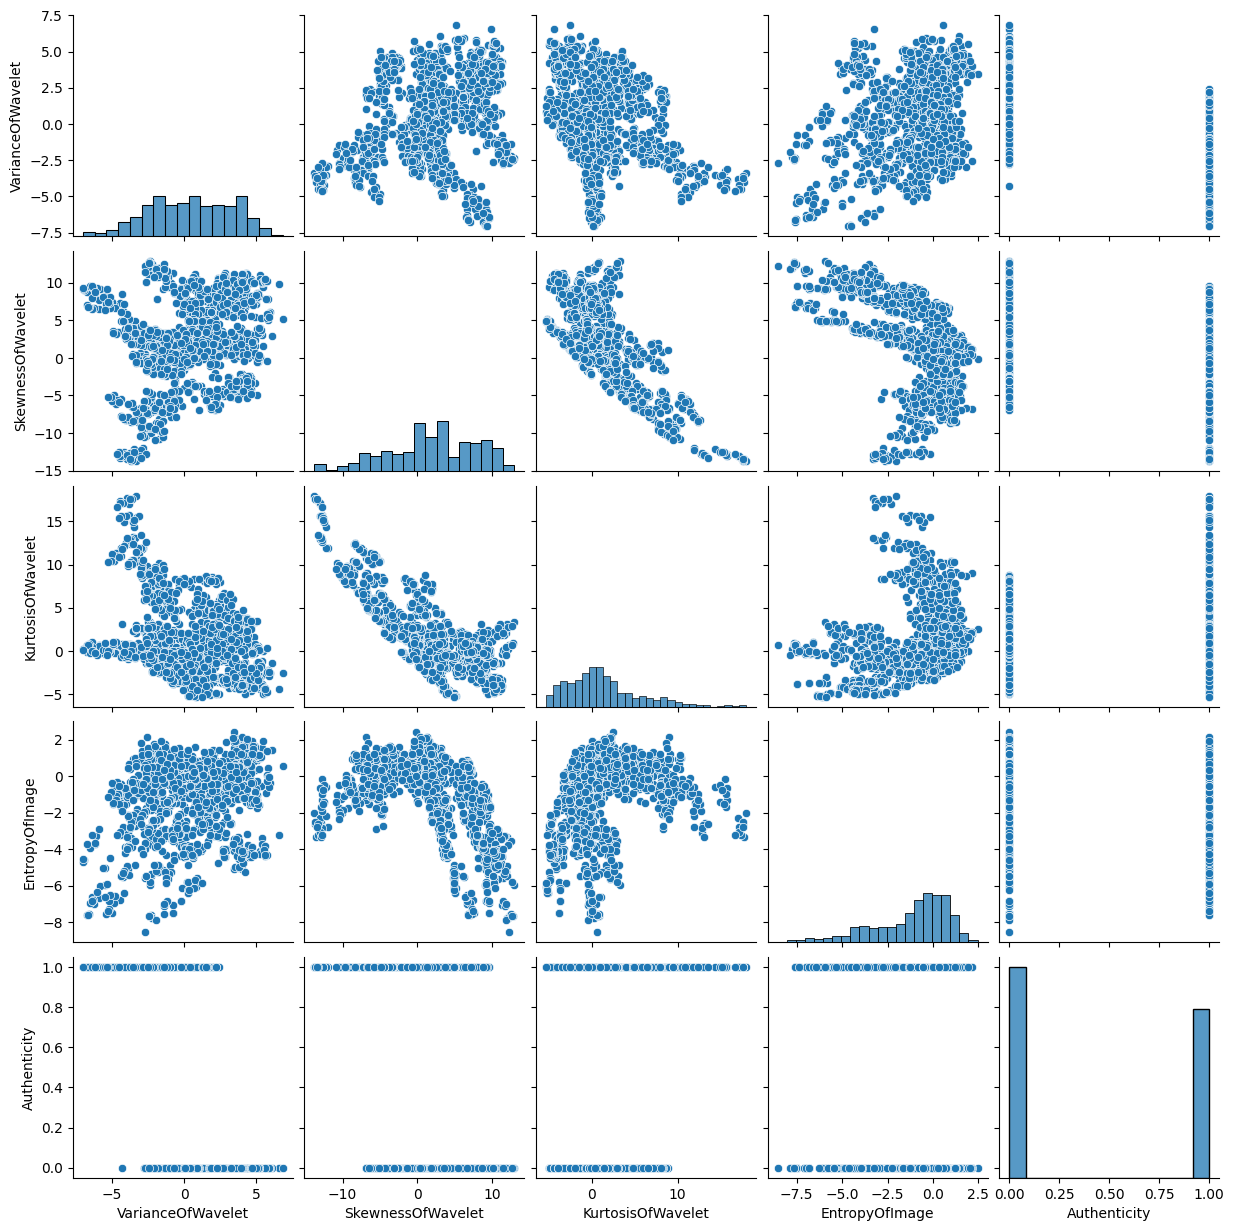

In [ ]:
sb.pairplot(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.03, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
import numpy as np

In [ ]:
authenticity = np.array(['Yes', 'No', 'Yes', 'No'])
authenticity_numeric = np.where(authenticity == 'Yes', 1,0)
print(authenticity_numeric)

[1 0 1 0]


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
# Convert the list to a NumPy array before applying astype
data['authenticity'] = labelEncoder.fit_transform(np.array(data['authenticity']).astype(str))

In [ ]:
prediction = classifier.predict(X_test)
prediction

array(['No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No'], dtype=object)

In [ ]:
y_test

,Auth
1023,No
642,Yes
1196,No
31,Yes
253,Yes
535,Yes
184,Yes
758,Yes
1308,No
914,No


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

          No       0.95      1.00      0.97        18
         Yes       1.00      0.96      0.98        24

    accuracy                           0.98        42
   macro avg       0.97      0.98      0.98        42
weighted avg       0.98      0.98      0.98        42

[[18  0]
 [ 1 23]]


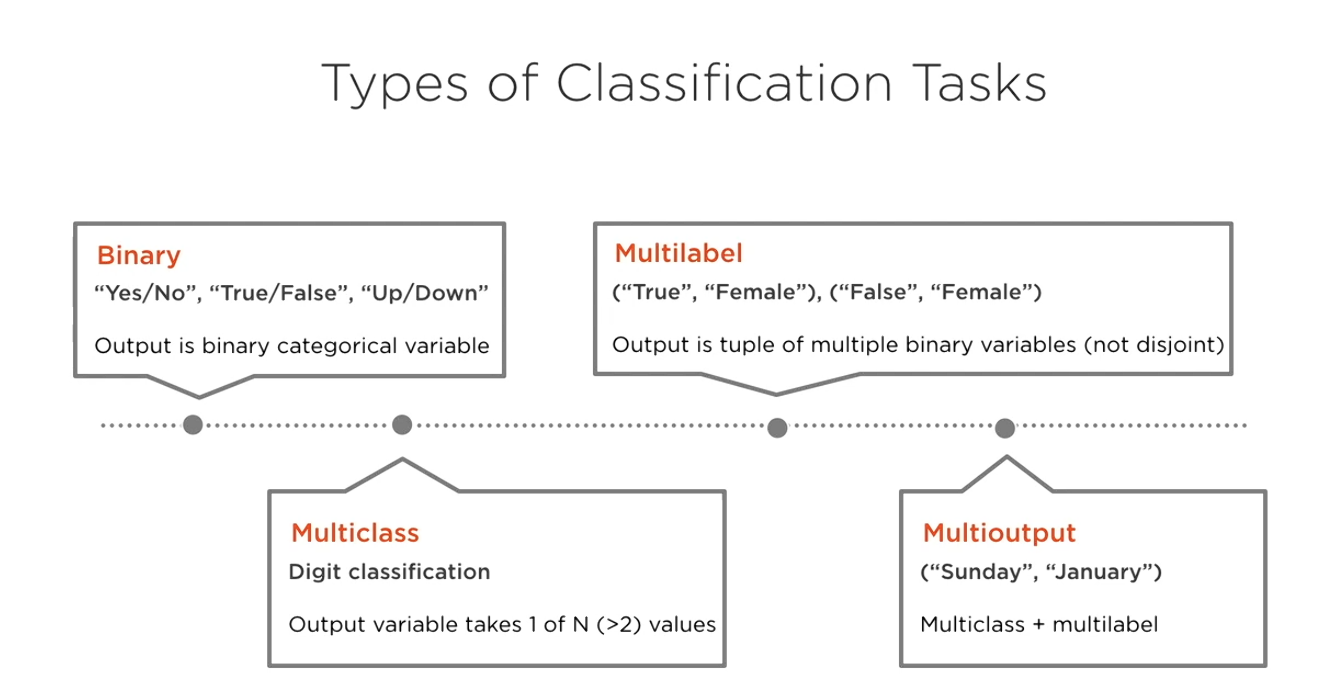

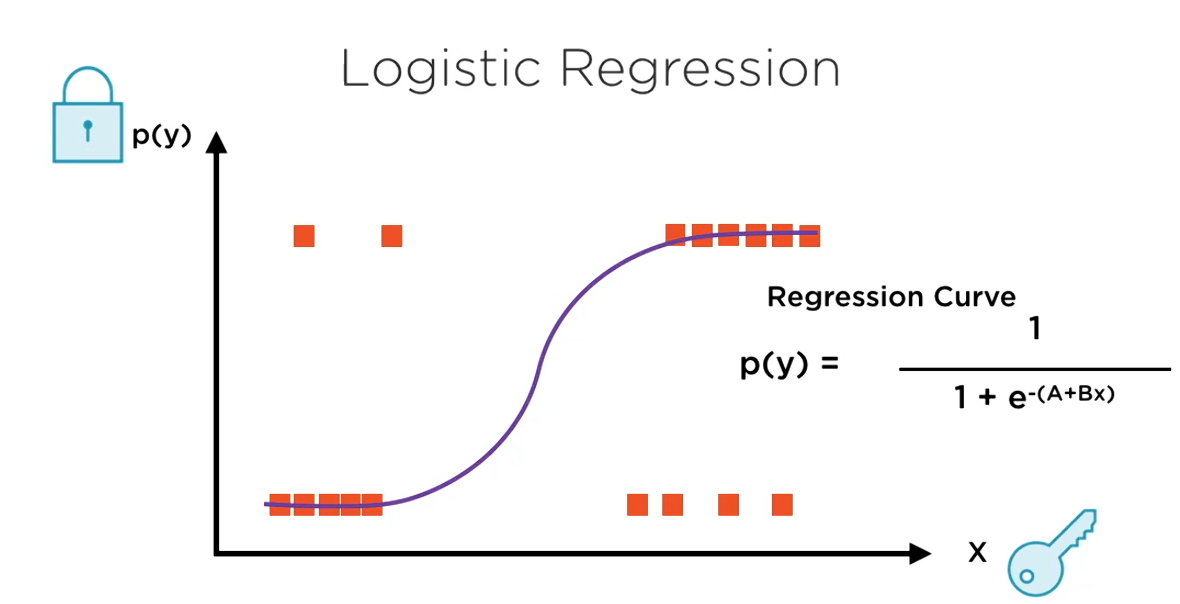

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gen = pd.read_csv("/content/sample_data/gender_voice_dataset.csv")

In [ ]:
gen.sample(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
949,0.194060,0.063240,0.226737,0.127609,0.250779,0.123170,1.621701,4.967390,0.868906,0.228162,...,0.194060,0.128530,0.047666,0.277457,1.333426,0.023438,6.140625,6.117188,0.152414,male
1841,0.179750,0.034082,0.174082,0.167790,0.187016,0.019226,4.997551,34.136764,0.800227,0.223223,...,0.179750,0.164371,0.015702,0.225352,0.898828,0.164062,6.625000,6.460938,0.139258,female
1455,0.179983,0.059359,0.183590,0.144615,0.225128,0.080513,1.381203,4.817141,0.924550,0.409303,...,0.179983,0.097720,0.048193,0.277457,0.956032,0.023438,8.109375,8.085938,0.096218,male
1819,0.178653,0.033573,0.176154,0.165792,0.186967,0.021175,3.414958,15.179379,0.823984,0.216122,...,0.178653,0.167377,0.043478,0.231884,0.833008,0.164062,6.453125,6.289062,0.195352,female
1482,0.194074,0.068020,0.211194,0.159170,0.248889,0.089719,1.681314,6.282421,0.948920,0.643015,...,0.194074,0.111646,0.017719,0.246154,0.767578,0.242188,6.046875,5.804688,0.137003,male
1597,0.184484,0.045272,0.178621,0.155499,0.211270,0.055771,1.698171,5.955017,0.912666,0.337722,...,0.184484,0.156678,0.018913,0.258065,0.797917,0.007812,5.953125,5.945312,0.210145,female
206,0.153504,0.074293,0.172015,0.099194,0.215708,0.116514,1.425215,5.243747,0.964783,0.729355,...,0.153504,0.119785,0.019536,0.250000,1.447656,0.109375,6.289062,6.179688,0.239697,male
188,0.128337,0.083163,0.122667,0.053867,0.202933,0.149067,1.900327,8.405812,0.961016,0.736413,...,0.128337,0.110157,0.017094,0.228571,0.231120,0.015625,3.539062,3.523438,0.099489,male
2924,0.173372,0.073989,0.190638,0.131436,0.228617,0.097181,1.908471,7.353245,0.943016,0.610966,...,0.173372,0.112939,0.016343,0.271186,0.276242,0.007812,1.070312,1.062500,0.237036,female
1870,0.129146,0.087656,0.141550,0.040037,0.215166,0.175129,1.821410,6.826310,0.949958,0.678018,...,0.129146,0.197429,0.021053,0.235294,0.700893,0.054688,3.125000,3.070312,0.172049,female


In [ ]:
gen.shape

(3168, 21)

In [ ]:
gen.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
gen['label'] = labelEncoder.fit_transform(gen['label'].astype(str))


In [ ]:
gen.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


<Axes: title={'center': 'meanfreq'}, xlabel='label'>

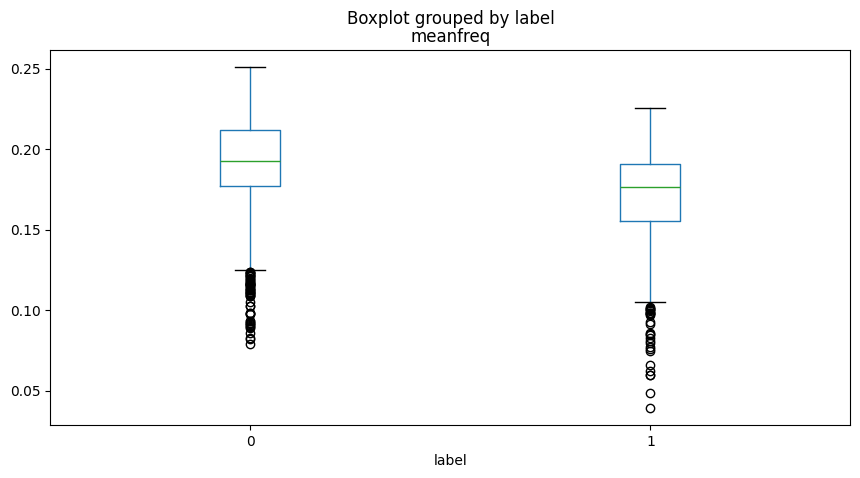

In [ ]:
gen.boxplot(by = 'label', column = ['meanfreq'], grid = False, figsize = (10,5))

In [ ]:
from sklearn.model_selection import train_test_split
X = gen.drop('label', axis=1)
y = gen['label']
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape , y_train.shape

((2534, 20), (2534,))

In [ ]:
X_test.shape , y_test.shape

((634, 20), (634,))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Changed 'penalty' to 'l2' which is a valid option.
logistic_model = LogisticRegression(penalty='l2', solver='liblinear') # used under the hood
logistic_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}") # this is the number voices accuratly classified as male or female
print(f"Precision: {precision:.2f}") # of all voices These are the possitive identification correctly
print(f"Recall: {recall:.2f}") # off all male voices  how many were  classified correctly  as male

Accuracy: 0.91
Precision: 0.88
Recall: 0.97


##Support Vector Machine

In [ ]:
datatt = pd.read_csv("/content/sample_data/german_credit_data_dataset.csv")

In [ ]:
datatt

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2
2,A14,12,A34,A46,2096.0,A61,A74,2.0,A93,A101,...,A121,49.0,A143,A152,1.0,A172,2,A191,A201,1
3,A11,42,A32,A42,7882.0,A61,A74,2.0,A93,A103,...,A122,45.0,A143,A153,1.0,A173,2,A191,A201,1
4,A11,24,A33,A40,4870.0,A61,A73,3.0,A93,A101,...,A124,53.0,A143,A153,2.0,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736.0,A61,A74,3.0,A92,A101,...,A121,31.0,A143,A152,1.0,A172,1,A191,A201,1
996,A11,30,A32,A41,3857.0,A61,A73,4.0,A91,A101,...,A122,40.0,A143,A152,1.0,A174,1,A192,A201,1
997,A14,12,A32,A43,804.0,A61,A75,4.0,A93,A101,...,A123,38.0,A143,A152,1.0,A173,1,A191,A201,1
998,A11,45,A32,A43,1845.0,A61,A73,4.0,A93,A101,...,A124,23.0,A143,A153,1.0,A173,1,A192,A201,2


In [ ]:
datatt.shape

(1000, 21)

In [ ]:
datatt.columns

Index(['checking_account_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings', 'present_employment', 'installment_rate',
       'personal', 'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'existing_credits', 'job',
       'dependents', 'telephone', 'foreign_worker', 'customer_type'],
      dtype='object')

In [ ]:
datatt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   other_debtors            1000 non-null   object 
 9   property                 1000 non-null   object 
 10  age                      1000 non-null   float64
 11  housing                  1000 non-null   object 
 12  existing_credits         1000 non-null   float64
 13  job                      1000 non-null   object 
 14  dependents               

In [ ]:
datatt.index

RangeIndex(start=0, stop=1000, step=1)

In [ ]:
datatt.describe()

,duration,credit_amount,installment_rate,age,existing_credits,dependents,customer_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [ ]:
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the dictionary 'data' into a Pandas DataFrame
datatt = pd.DataFrame(data)  # Assuming 'data' is your dictionary

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Now you can calculate the correlation matrix
correlation = numeric_data.corr()
correlation

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
duration,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.214927
credit_amount,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.154739
installment_rate,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.072404
present_residence,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.002967
age,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.091127
existing_credits,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.045732
dependents,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.003015
customer_type,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,1.000000


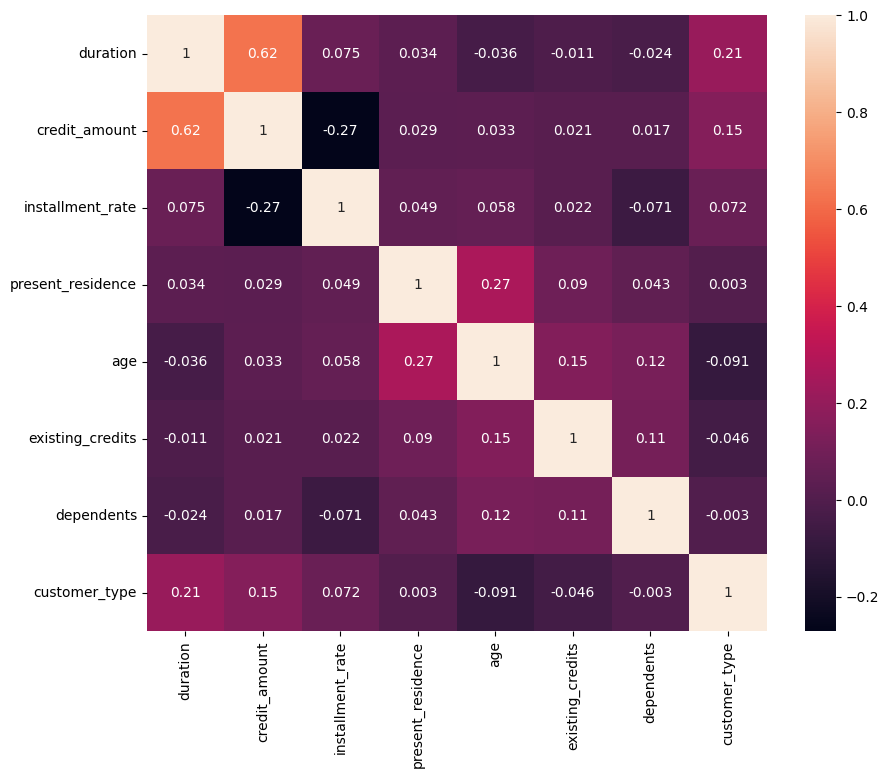

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

In [ ]:
datatt = datatt.drop(['telephone', 'personal', 'present_residence', 'other_installment_plans'], axis=1)

In [ ]:
datatt['savings'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
datatt['savings'] = le.fit_transform(datatt['savings'])
print(datatt.head())


   duration  credit_amount  savings  installment_rate   age  existing_credits  \
0         6         1169.0        0               4.0  67.0               2.0   
1        48         5951.0        0               2.0  22.0               1.0   
2        12         2096.0        0               2.0  49.0               1.0   
3        42         7882.0        0               2.0  45.0               1.0   
4        24         4870.0        0               3.0  53.0               2.0   

   dependents  customer_type  checking_account_status_A11  \
0           1              1                         True   
1           1              2                        False   
2           2              1                        False   
3           2              1                         True   
4           2              2                         True   

   checking_account_status_A12  ...  housing_A153  other_debtors_A101  \
0                        False  ...         False                True   


In [ ]:
from sklearn.preprocessing import LabelEncoder

savings_dict = {"A65" : 0, "A61" : 1, "A62" : 2, "A63" : 3, "A64" : 4}
datatt['savings'].replace(savings_dict, inplace=True)
datatt.head()

<ipython-input-124-50833de982b8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datatt['savings'].replace(savings_dict, inplace=True)


,duration,credit_amount,savings,installment_rate,age,existing_credits,dependents,customer_type,checking_account_status_A11,checking_account_status_A12,...,housing_A153,other_debtors_A101,other_debtors_A102,other_debtors_A103,job_A171,job_A172,job_A173,job_A174,foreign_worker_A201,foreign_worker_A202
0,6,1169.0,0,4.0,67.0,2.0,1,1,True,False,...,False,True,False,False,False,False,True,False,True,False
1,48,5951.0,0,2.0,22.0,1.0,1,2,False,True,...,False,True,False,False,False,False,True,False,True,False
2,12,2096.0,0,2.0,49.0,1.0,2,1,False,False,...,False,True,False,False,False,True,False,False,True,False
3,42,7882.0,0,2.0,45.0,1.0,2,1,True,False,...,True,False,False,True,False,False,True,False,True,False
4,24,4870.0,0,3.0,53.0,2.0,2,2,True,False,...,True,True,False,False,False,False,True,False,True,False


In [ ]:
# Create DataFrame
datatt = pd.DataFrame(data)

# One-hot encode specified columns
datatt = pd.get_dummies(
    datatt,
    columns=[
        'checking_account_status', 'credit_history', 'purpose', 'present_employment',
        'property', 'housing', 'other_debtors', 'job', 'foreign_worker'
    ]
)

# Display the transformed dataset
print(datatt.head())

   duration  credit_amount savings  installment_rate personal  \
0         6         1169.0     A65               4.0      A93   
1        48         5951.0     A61               2.0      A92   
2        12         2096.0     A61               2.0      A93   
3        42         7882.0     A61               2.0      A93   
4        24         4870.0     A61               3.0      A93   

   present_residence   age other_installment_plans  existing_credits  \
0                4.0  67.0                    A143               2.0   
1                2.0  22.0                    A143               1.0   
2                3.0  49.0                    A143               1.0   
3                4.0  45.0                    A143               1.0   
4                4.0  53.0                    A143               2.0   

   dependents  ... housing_A153  other_debtors_A101  other_debtors_A102  \
0           1  ...        False                True               False   
1           1  ...        

In [ ]:
datatt.shape

(1000, 52)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def naive_bayes(X_train, y_train, X_test):
    classifier = GaussianNB() # uses naive bayse for classification
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def k_nearest_neighbors(X_train, y_train, X_test):
    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def svc(X_train, y_train, X_test):
    classifier = SVC(kernel='rbf', gamma='scale')
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
def decision_tree(X_train, y_train, X_test):
    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(X_train, y_train)

    return classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X = datatt.drop('customer_type', axis=1)
y = datatt['customer_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def build_and_train_classifier(x_train, y_train, classfication_fn):

    model = classfication_fn(x_train, y_train)
    y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = accuracy_score(y_test, y_pred)

    print("Training Score:", train_score)
    print("Testing Score:", test_score)
    accuracy = accuracy_score(y_test, y_pred)

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
import pandas as pd

# Example dataset (replace with your dataset if needed)
# Here, I will use the wine dataset from sklearn for demonstration purposes.
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
    """
    Train and evaluate a classification model.
    Arguments:
    - x_train: Training features
    - y_train: Training labels
    - x_test: Testing features
    - y_test: Testing labels
    - classification_fn: A classification model (e.g., Decision Tree, Naive Bayes)

    Returns:
    - None (prints the training and testing accuracy)
    """
    # Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")


# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)


print("\nNaive_bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)

Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.9444

Gaussian Naive Bayes:
Training Accuracy: 0.9718
Testing Accuracy: 1.0000

Naive_bayes:
Training Accuracy: 0.9718
Testing Accuracy: 1.0000


In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_wine
import pandas as pd

In [ ]:
# Example dataset (replace with your dataset if needed)
# Here, I will use the wine dataset from sklearn for demonstration purposes.
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Function to build and train a classifier
def build_and_train_classifier(x_train, y_train, x_test, y_test, classification_fn):
# Initialize the model (classification_fn should be a class like DecisionTreeClassifier or GaussianNB)
    model = classification_fn()

    # Train the model on training data
    model.fit(x_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate accuracy
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    # Print results
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Testing Accuracy: {test_score:.4f}")

In [ ]:
# Train and evaluate with Decision Tree
print("Decision Tree Classifier:")
build_and_train_classifier(X_train, y_train, X_test, y_test, DecisionTreeClassifier)

# Train and evaluate with Gaussian Naive Bayes
print("\nGaussian Naive Bayes:")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)



Decision Tree Classifier:
Training Accuracy: 1.0000
Testing Accuracy: 0.9444

Gaussian Naive Bayes:
Training Accuracy: 0.9718
Testing Accuracy: 1.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# ... (your existing code to load and prepare data) ...

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train and X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print("Model: Naive Bayes")
build_and_train_classifier(X_train, y_train, X_test, y_test, GaussianNB)
# ... (rest of your code) ...

Model: Naive Bayes
Training Score:  0.7362
Testing Score :  0.7


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['savings']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['savings']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("/content/sample_data/winequalitywhite.csv")
# Load dataset (assuming 'wine_data' is the dataframe with wine data)
X = data.drop(columns=['quality'])  # Features (drop target 'quality')
y = data['quality']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 0.5690247717275326
R-squared (R²): 0.2652750042119667


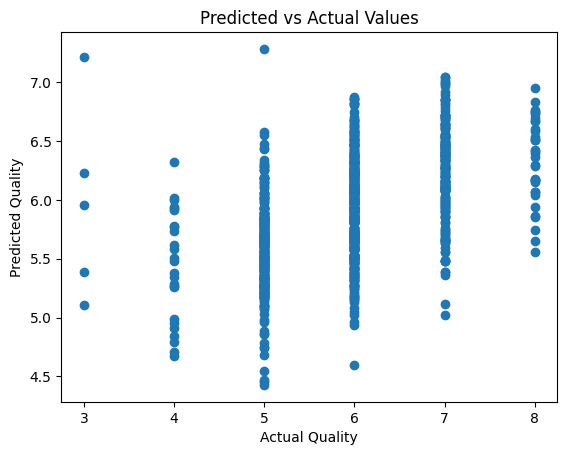

In [ ]:
import matplotlib.pyplot as plt

# Plot Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted vs Actual Values')
plt.show()


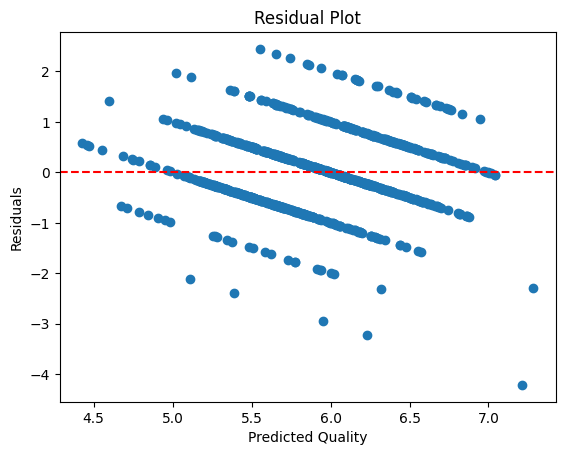

In [ ]:
# Plot Residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
